In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from core import *

In [47]:
class Simulate:
    def __init__(self,p,n,week,target,star,exchange_rate_dict,state_to_final,cashed_data):
        self.p = p # 칠흑 드랍율
        self.n = n # 시뮬레이션 횟수
        self.week = week # 칠흑 파밍 주
        self.success_p={17:1, 18:0.9388, 19:0.7727, 20:0.5587, 21:0.4576, 22:0.2920} # 올파방 목표 성공률
        self.target = target # 칠흑 완성 목표
        self.star = star # [루컨,마깃,몽벨,거공,커포,고근,마도서]
        self.exchange_rate_dict =exchange_rate_dict # 환산값(타스탯>스탯)
        self.state_to_final =state_to_final # 환산값(스택>최종뎀)
        self.cashed_data = cashed_data # 최종뎀 캐싱
        self.result=[]
        self.total_change=[]
        self.debug=[]

    def simulating(self):
        self.result=[]
        self.total_change=[]
        sep=5000
        for i in tqdm(range(int(self.n/sep))):
            is_drop=np.random.rand(sep,self.week,7)<self.p # [루컨,마깃,몽벨,거공,커포,고근,마도서]
            drop_count=is_drop.sum(axis=1) # shape : (iter, 7)
            max_drop=drop_count.max()

            is_completed=np.zeros((max_drop,sep,7),dtype=bool) # determine target success
            for ind,_ in enumerate(is_completed):
                is_completed[ind]=drop_count>=ind+1

            target_success=np.random.rand(max_drop,sep,7)<self.success_p[self.target] # target 달성 판별용 random 값
            target_success[:,:,6]=True # 마도서는 항상 성공

            is_completed=is_completed*target_success
            final=np.sum(is_completed,axis=0,dtype=bool) # final : batch * final result(boolean)
            index=np.sum(final*np.array([64,32,16,8,4,2,1]),axis=-1)
            self.total_change.append(index)
            self.result.append(np.sum(final,axis=1))

        self.result=np.array(self.result).flatten()
        self.total_change=np.array(self.total_change).flatten()
        self.debug=self.total_change
        self.total_change=self.cashed_data[self.total_change]        
        self.total_change[self.total_change<0]=0
        
    def plot(self):
        plt.rcParams['font.family'] = 'Malgun Gothic'
        plt.rcParams['figure.figsize'] = [10, 4]
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)


        ax1.set_title("%d주 동안 %d성 칠흑셋 완성 확률"%(self.week,self.target))
        ax1.hist(self.result,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],density=True, cumulative=-1, label='누적 확률', color='skyblue',rwidth=0.85)

        ax1.hist(self.result,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5],density=True, cumulative=False, label='확률', color='orange',rwidth=0.85)

        ax1.set_xlabel("완성된 %d성 칠흑개수"%self.target)
        ax1.set_ylabel("확률")
        ax1.legend(loc='upper right')

        print("%d주 동안 %d성 칠흑셋 완성 확률"%(self.week,self.target))
        for i in range(8):
            print("%d 개 확률 : %5.2f %%"%(i, np.sum(self.result==i)/self.result.shape[0]*100))

        print("")

        ax2.set_title("%d주 동안 %d성 칠흑셋 목표시 최종뎀 증가 분포"%(self.week,self.target))

        ax2.hist(self.total_change ,density=True, cumulative=False, label='확률', color='skyblue',rwidth=0.85)

        ax2.set_xlabel("최종뎀 증가량(%)")
        ax2.set_ylabel("확률")

        print("%d주 동안 %d성 칠흑셋 최종뎀 증가량"%(self.week,self.target))
        print("평균 : %5.2f %%"%np.average(self.total_change))
        print("표준편차 : %5.2f %%"%np.std(self.total_change),"\n")
        print("상위 1%% : %5.2f %%"%np.quantile(self.total_change,0.99))
        print("상위 10%% : %5.2f %%"%np.quantile(self.total_change,0.9))
        print("상위 25%% : %5.2f %%"%np.quantile(self.total_change,0.75))
        print("중간값 : %5.2f %%"%np.quantile(self.total_change,0.5))
        print("하위 25%% : %5.2f %%"%np.quantile(self.total_change,0.25))
        print("하위 10%% : %5.2f %%"%np.quantile(self.total_change,0.10))
        print("하위 1%% : %5.2f %%"%np.quantile(self.total_change,0.01))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.93it/s]


52주 동안 22성 칠흑셋 완성 확률
0 개 확률 :  5.65 %
1 개 확률 : 22.49 %
2 개 확률 : 32.99 %
3 개 확률 : 24.96 %
4 개 확률 : 10.81 %
5 개 확률 :  2.71 %
6 개 확률 :  0.37 %
7 개 확률 :  0.02 %

52주 동안 22성 칠흑셋 최종뎀 증가량
평균 :  4.57 %
표준편차 :  3.80 % 

상위 1% : 15.33 %
상위 10% :  9.88 %
상위 25% :  6.87 %
중간값 :  4.12 %
하위 25% :  1.73 %
하위 10% :  0.47 %
하위 1% :  0.00 %


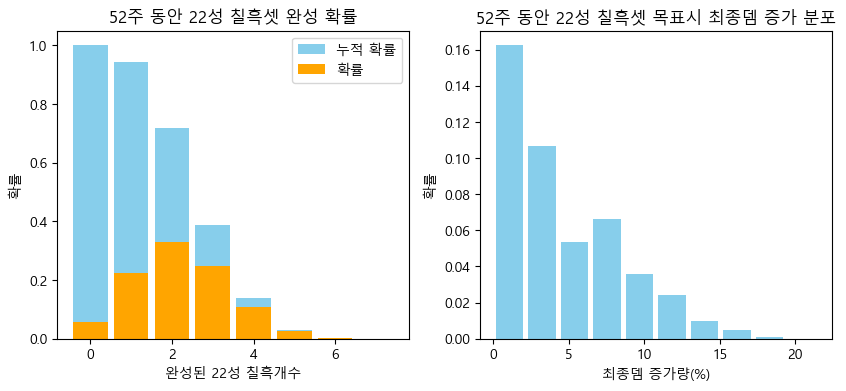

In [57]:
# init value
p=0.02 # 칠흑 드랍율
n=5000000 # 시뮬레이션 횟수 (1백만)
week=52 # 52 주 (1년)
target = 22 # 칠흑 완성 목표
star=[22,22,22,22,22,22,0] # [루컨,마깃,몽벨,거공,커포,고근,마도서]


exchange_rate_dict = {'all_state': 1.1 , 'boss_damage': 11.74 , 'attack': 3.39, 'ignore_defense': 7.88, 'critical_damage': 32.63}
state_to_final=0.01035

# additional_option list
additional_option_100={140:121, 145:121, 150:121 ,160:132 ,200:149}
additional_option_300={140:129, 145:129, 150:129 ,160:141 ,200:159}

# cashing
cashed_data=cashing_final_damage(star,additional_option_100,exchange_rate_dict,state_to_final)

simulation=Simulate(p,n,week,target,star,exchange_rate_dict,state_to_final,cashed_data)
simulation.simulating()
simulation.plot()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.09it/s]


52주 동안 21성 칠흑셋 완성 확률
0 개 확률 :  1.98 %
1 개 확률 : 10.99 %
2 개 확률 : 24.77 %
3 개 확률 : 29.97 %
4 개 확률 : 21.23 %
5 개 확률 :  8.85 %
6 개 확률 :  2.02 %
7 개 확률 :  0.20 %

52주 동안 21성 칠흑셋 최종뎀 증가량
평균 :  4.93 %
표준편차 :  3.54 % 

상위 1% : 13.48 %
상위 10% :  9.99 %
상위 25% :  7.52 %
중간값 :  4.66 %
하위 25% :  2.24 %
하위 10% :  0.47 %
하위 1% :  0.00 %


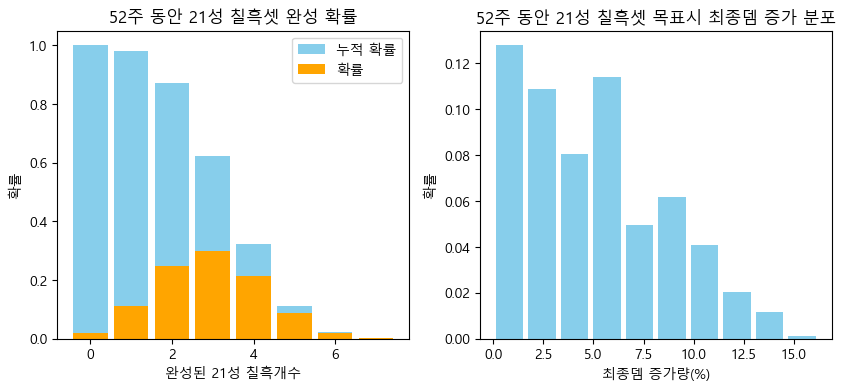

In [51]:
# init value
target = 21 # 칠흑 완성 목표
star=[21,21,21,21,21,21,0] # [루컨,마깃,몽벨,거공,커포,고근,마도서]

# cashing
cashed_data=cashing_final_damage(star,additional_option_100,exchange_rate_dict,state_to_final)

simulation=Simulate(p,n,week,target,star,exchange_rate_dict,state_to_final,cashed_data)
simulation.simulating()
simulation.plot()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.47it/s]


52주 동안 20성 칠흑셋 완성 확률
0 개 확률 :  1.05 %
1 개 확률 :  6.93 %
2 개 확률 : 19.23 %
3 개 확률 : 28.92 %
4 개 확률 : 25.80 %
5 개 확률 : 13.60 %
6 개 확률 :  3.97 %
7 개 확률 :  0.49 %

52주 동안 20성 칠흑셋 최종뎀 증가량
평균 :  3.90 %
표준편차 :  2.89 % 

상위 1% : 10.11 %
상위 10% :  8.26 %
상위 25% :  6.05 %
중간값 :  3.50 %
하위 25% :  1.39 %
하위 10% :  0.11 %
하위 1% :  0.00 %


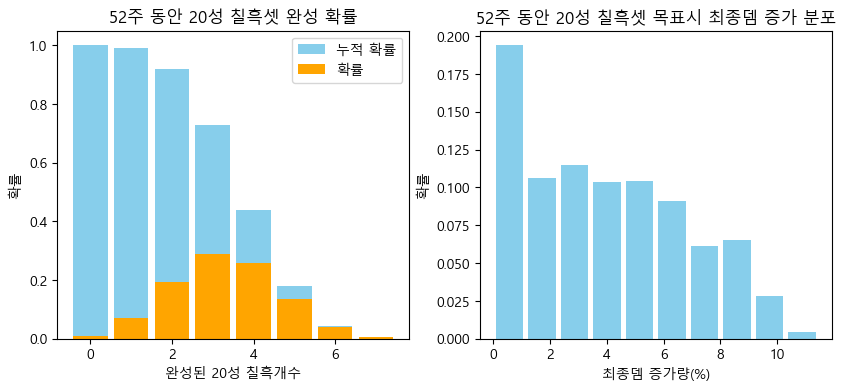

In [56]:
# init value
target = 20 # 칠흑 완성 목표
star=[20,20,20,20,20,20,0] # [루컨,마깃,몽벨,거공,커포,고근,마도서]

# cashing
cashed_data=cashing_final_damage(star,additional_option_100,exchange_rate_dict,state_to_final)

simulation=Simulate(p,n,week,target,star,exchange_rate_dict,state_to_final,cashed_data)
simulation.simulating()
simulation.plot()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 46.00it/s]


52주 동안 19성 칠흑셋 완성 확률
0 개 확률 :  0.27 %
1 개 확률 :  2.54 %
2 개 확률 : 10.11 %
3 개 확률 : 22.32 %
4 개 확률 : 29.44 %
5 개 확률 : 23.23 %
6 개 확률 : 10.20 %
7 개 확률 :  1.89 %

52주 동안 19성 칠흑셋 최종뎀 증가량
평균 :  2.85 %
표준편차 :  2.18 % 

상위 1% :  7.17 %
상위 10% :  5.90 %
상위 25% :  4.68 %
중간값 :  2.63 %
하위 25% :  0.82 %
하위 10% :  0.00 %
하위 1% :  0.00 %


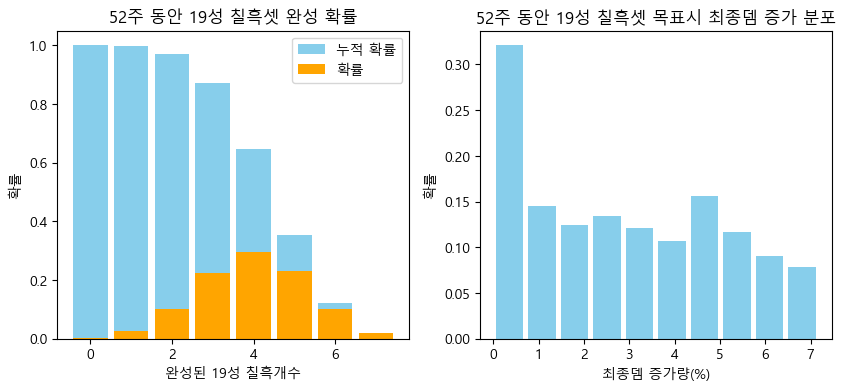

In [52]:
# init value
target = 19 # 칠흑 완성 목표
star=[19,19,19,19,19,19,0] # [루컨,마깃,몽벨,거공,커포,고근,마도서]

# cashing
cashed_data=cashing_final_damage(star,additional_option_100,exchange_rate_dict,state_to_final)

simulation=Simulate(p,n,week,target,star,exchange_rate_dict,state_to_final,cashed_data)
simulation.simulating()
simulation.plot()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 41.44it/s]


52주 동안 18성 칠흑셋 완성 확률
0 개 확률 :  0.09 %
1 개 확률 :  1.13 %
2 개 확률 :  5.76 %
3 개 확률 : 16.40 %
4 개 확률 : 27.94 %
5 개 확률 : 28.54 %
6 개 확률 : 16.20 %
7 개 확률 :  3.95 %

52주 동안 18성 칠흑셋 최종뎀 증가량
평균 :  1.18 %
표준편차 :  1.32 % 

상위 1% :  4.41 %
상위 10% :  3.07 %
상위 25% :  2.43 %
중간값 :  0.42 %
하위 25% :  0.00 %
하위 10% :  0.00 %
하위 1% :  0.00 %


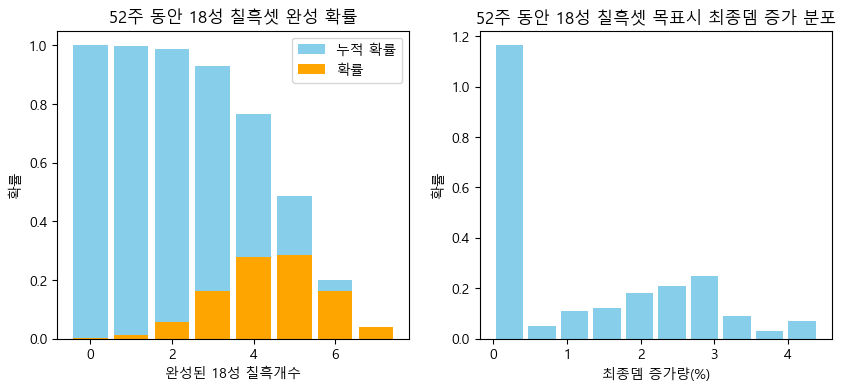

In [53]:
# init value
target = 18 # 칠흑 완성 목표
star=[18,18,18,18,18,18,0] # [루컨,마깃,몽벨,거공,커포,고근,마도서]

# cashing
cashed_data=cashing_final_damage(star,additional_option_100,exchange_rate_dict,state_to_final)

simulation=Simulate(p,n,week,target,star,exchange_rate_dict,state_to_final,cashed_data)
simulation.simulating()
simulation.plot()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.06it/s]


52주 동안 17성 칠흑셋 완성 확률
0 개 확률 :  0.06 %
1 개 확률 :  0.84 %
2 개 확률 :  4.64 %
3 개 확률 : 14.40 %
4 개 확률 : 26.79 %
5 개 확률 : 29.86 %
6 개 확률 : 18.50 %
7 개 확률 :  4.92 %

52주 동안 17성 칠흑셋 최종뎀 증가량
평균 :  0.16 %
표준편차 :  0.47 % 

상위 1% :  2.19 %
상위 10% :  0.55 %
상위 25% :  0.00 %
중간값 :  0.00 %
하위 25% :  0.00 %
하위 10% :  0.00 %
하위 1% :  0.00 %


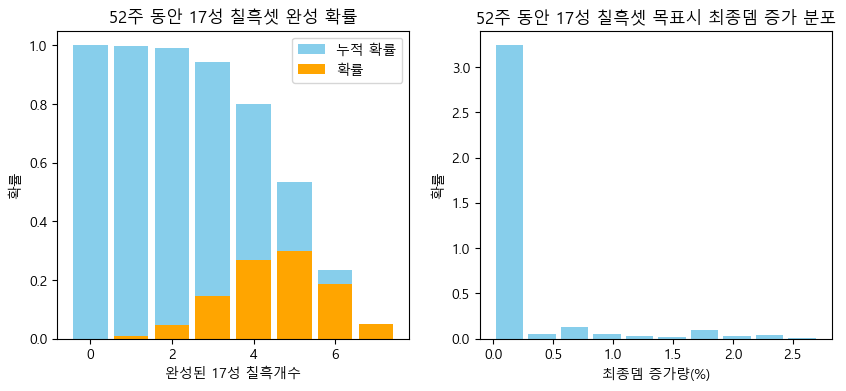

In [54]:
# init value
target = 17 # 칠흑 완성 목표
star=[17,17,17,17,17,17,0] # [루컨,마깃,몽벨,거공,커포,고근,마도서]

# cashing
cashed_data=cashing_final_damage(star,additional_option_100,exchange_rate_dict,state_to_final)

simulation=Simulate(p,n,week,target,star,exchange_rate_dict,state_to_final,cashed_data)
simulation.simulating()
simulation.plot()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 47.32it/s]


52주 동안 21성 칠흑셋 완성 확률
0 개 확률 :  1.99 %
1 개 확률 : 11.00 %
2 개 확률 : 24.78 %
3 개 확률 : 29.93 %
4 개 확률 : 21.22 %
5 개 확률 :  8.87 %
6 개 확률 :  2.03 %
7 개 확률 :  0.19 %

52주 동안 21성 칠흑셋 최종뎀 증가량
평균 :  4.21 %
표준편차 :  3.34 % 

상위 1% : 12.19 %
상위 10% :  8.97 %
상위 25% :  6.35 %
중간값 :  3.42 %
하위 25% :  1.08 %
하위 10% :  0.30 %
하위 1% :  0.00 %


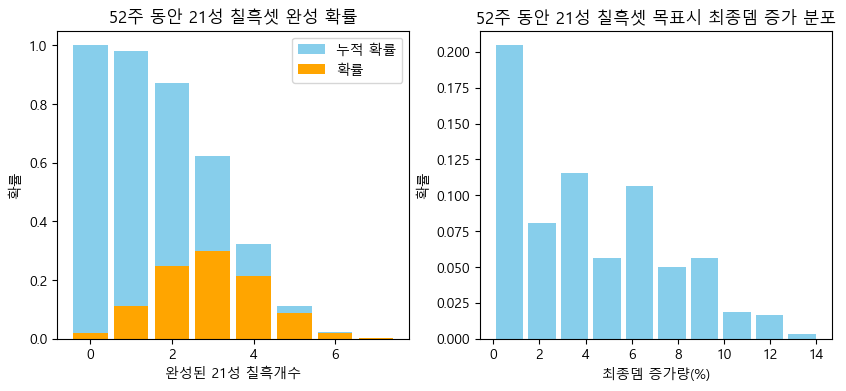

In [55]:
# init value
target = 21 # 칠흑 완성 목표
star=[21,21,21,18,21,21,0] # [루컨,마깃,몽벨,거공,커포,고근,마도서]

# cashing
cashed_data=cashing_final_damage(star,additional_option_100,exchange_rate_dict,state_to_final)

simulation=Simulate(p,n,week,target,star,exchange_rate_dict,state_to_final,cashed_data)
simulation.simulating()
simulation.plot()